<center><h1 style="font-size:60px;"><b>PYTORCH</b></h1></center>

---

# 00 - INTRODUCTION

**PyTorch** is a popular open-source deep learning framework developed by Facebook AI Research. It allows you to build, train, and deploy neural networks and perform efficient numerical computations. Key Features:

1. Tensors & GPU Acceleration: works like NumPy but can run computations on **GPU**, which accelerates deep learning training.  
2. Dynamic Computational Graphs: it uses eager execution, so you can build and modify computation graphs on the fly. It is also very intuitive for debugging and research. Dynamic means the graph is built on-the-fly, as your code runs.
3. Autograd (Automatic Differentiation): it automatically computes gradients for backpropagation.  
4. Extensive Ecosystem: 
   - `torchvision` → computer vision  
   - `torchaudio` → audio processing  
   - `torchtext` → natural language processing  
   - `PyTorch Lightning` → easier model training  
   - `Hugging Face Transformers` → pre-trained large models  

Use Cases:
- Deep Learning / Neural Networks
  - Image classification (CNNs)  
  - Text / NLP models (RNNs, Transformers)  
  - Reinforcement Learning  
  - Generative models (GANs, VAEs)
- Scientific Computing
  - Linear algebra, tensor operations  
  - GPU-accelerated numerical simulations
- Research & Prototyping
  - Easy to experiment with new model architectures thanks to dynamic graphs


In short: PyTorch is ideal for tensors, neural networks, and GPU-accelerated computation, for both research and production.

### WHY USING GPU

A CPU is the general-purpose processor in your computer. It handles a few tasks at a time very flexibly, making it ideal for normal applications like running scripts, web browsing, or office software. However, when it comes to training deep learning models, CPUs are relatively slow because these tasks involve performing billions of simple mathematical operations on large matrices and tensors.

A GPU (Graphics Processing Unit) was originally designed for rendering graphics, but it excels at performing many computations in parallel. This makes it perfect for deep learning, where neural networks require massive amounts of matrix and tensor operations. Using a GPU instead of a CPU can reduce training time from hours to minutes for large models. PyTorch can use NVIDIA GPUs via CUDA, allowing tensors and models to run directly on the GPU.

A TPU (Tensor Processing Unit) is Google’s specialized hardware for machine learning. Like a GPU, it is optimized for parallel tensor operations, but it can be even faster for certain deep learning tasks. TPUs are mainly available on Google Cloud or in Colab notebooks.

Useful notions:
- CUDA is a software that allows PyTorch to run computations on NVIDIA GPUs.
- Un’API (Application Programming Interface) è, in parole semplici, un insieme di regole e strumenti che permette a due programmi di “parlarsi” tra loro. Ad esempio un programma Python che usa PyTorch chiama funzioni come torch.tensor() o torch.matmul(). Quelle funzioni sono parte dell’API di PyTorch.

---

# 01 - BASICS

We import it with `import torch`. Here is [the documentation](https://docs.pytorch.org/docs/stable/index.html). 

In [4]:
import torch

import numpy as np

# ____________________________________________________________________
# TO BE CHECKED FROM HERE ONWARDS

### Tensors


However, everything requires some sort of tensors (n-dimensional arrays), and there are a handful of versions that you might want to keep in mind.

In [ ]:
a = torch.tensor([10, 100]) # Vector!

b = torch.tensor(10) # Scalar!

print('a:', a, ', size:', a.size())
print('b:', b, ', size:', b.size())

In [ ]:
c = torch.tensor([[1,2], [3,4]]) # Matrix
print('c:', c, ', size:', c.size())

d = torch.tensor([[[1,2], [3,4]], [[10,20], [30,40]]]) # (actual) Tensor!
print('d:', d, ', size:', d.size())

We can of course manipulate individual cells of the tensors

In [ ]:
c[0, 0] = 10000 # first top row element!
print('c:', c, ', size:', c.size())


But we can also manipulate tensors selecting some of their dimensions:

In [ ]:
print('The first column of c:', c[:, 0])

In [ ]:
print('The first MATRIX in d:\n', d[0, :, :])
print('The second MATRIX in d:\n', d[1, :, :])

In [ ]:
d[0, :, :] = torch.tensor([[2,1],[4,3]], device=d.device, dtype=d.dtype)
print('d:', d)

However, both of them have a very specific requirements, which is that whatever is inside, has to share the same type.
This is to efficiently allocate memory!

Torch will do some automatic casting, but we can set the DataType at creation!

In [ ]:
print(torch.tensor([10, 10.1]))
print(torch.tensor([10, 10.1], dtype=torch.float))
print(torch.tensor([10, 10.1], dtype=torch.int))

print(torch.tensor(10) * torch.tensor(10.0))
print(torch.tensor(10, dtype=torch.float) * torch.tensor(10.0, dtype=torch.int))

In [ ]:
print(torch.tensor([True, False]))
print(torch.tensor([True, False], dtype=torch.int))


We can also perform operations with tensors of different datatype, very useful!


In [ ]:
print(torch.tensor([True, False])*torch.tensor([10, 10]))

In [ ]:
a1 = torch.tensor([1])
print('a1 dtype:', a1.dtype)
a2 = torch.tensor([1.0])
print('a2 dtype:', a2.dtype)

Similar to numpy, we can also create tensors of zeros and ones:

In [ ]:
print(torch.zeros((1, 2))) # We need to input the desired sizes size
print(torch.ones((1, 2)))

It's also very helpful to create tensors of zeros and ones by copying the dimension of other tensors.

In [ ]:
print(torch.ones_like(d))
print(torch.zeros_like(c))

We can also set where to store our tensors, the central memory (RAM) and the memory of one of our GPUs!

In [ ]:
cpu_tensor = torch.tensor([1], device=torch.device('cpu'))
gpu_tensor = torch.tensor([1], device=torch.device('cuda'))

print('cpu_tensor:', cpu_tensor, 'deivice =', cpu_tensor.device)
print('gpu_tensor:', gpu_tensor)

cpu_tensor is on device 'cpu' so it's on the RAM!
gpu_tensor is on device 'cuda:0' so it's on the memory of the first GPU!

Torch supports cuda computations, so we need gpus with cuda cores (the green ones!)

**PSA:** Torch is very numpy friendly (they can go back and forth from np arrays to torch tensors), however, there is a very inconvenient scenario in both directions:  
 1. Torch to np: you loose the gradient
 2. np to torch: the casts tend to be using `float32`

In [ ]:
cpu_tensor.numpy()

In [ ]:
gpu_tensor.numpy()

Oh no, we can't convert tensors stored on the gpus to numpy?

We can, but we first need to move the tensor to the RAM!

In [ ]:
gpu_tensor.cpu().numpy()

In some cases you need to do also [this](https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html):

In [ ]:
gpu_tensor.detach().cpu().numpy()

# Anyways, most DeepLearning stuff is POOP.

![](https://i.redd.it/gpp8gmh0on861.jpg)

### Functions

Torch provides a ton of functionalities, and it's useless list here all possible ones, however feel free to use any online resource if you need to find a function that does a certain computation:

Heres the most useful ones:  
 1. `torch.nn` contains everything you can think that might be useful for neural networks
 3. `torch.optim` gradient optimizers
 4. `torch.random` for sampling
 5. `torch.math` math functions

### Gradient

Gradients are a big part of torch, as it provides an _automatic differentiation_ framework (God save for the chain-rule)


In [ ]:
# Estimates the gradient of f(x)=x^2 at points [-2, -1, 2, 4]
coordinates = (torch.tensor([-2., -1., 1., 4.]),)
values = torch.tensor([4., 1., 1., 16.], )
print('grad of x^2:\n', torch.gradient(values, spacing = coordinates))

# Estimates the gradient of the R^2 -> R function whose samples are
# described by the tensor t. Implicit coordinates are [0, 1] for the outermost
# dimension and [0, 1, 2, 3] for the innermost dimension, and function estimates
# partial derivative for both dimensions.
t = torch.tensor([[1, 2, 4, 8], [10, 20, 40, 80]])
print('grad of R^2->R fun:\n', torch.gradient(t))

However, we don't really need much of this to do ML.

## Let's start doing interesting stuff

If you got everything to this point, you are pretty much able to code anything in the DeepLearning community, well done

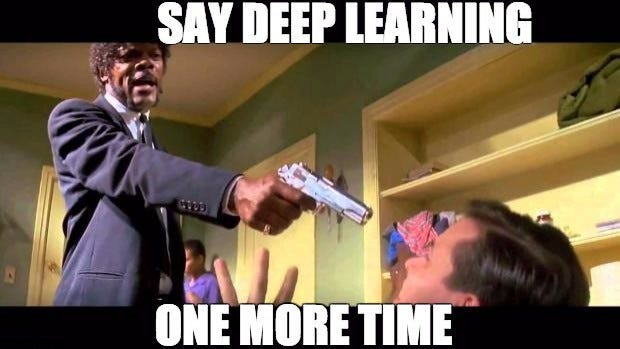


As for all respected optimization tutorials, why not starting from our favourite model implementing it together...

linear regression :-)

### Simplified 101 linear regression - aka estimate the average

Since I wanted to give you a simple example of what the whole code should look like, let's look into linear regression to estimate a linear function, by minimizing the mean squared error over a training dataset:
$$
L(\theta) = \frac{1}{N}\sum_{i=0}^N (y_i - f_\theta(x_i))^2
$$

$$
f_\theta(x) = Ax +b
$$

In [ ]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

print(x_train)
print(y_train)

We use poop, our regressor is a class that inherits from the ```torch.nn.Module``` class.

Every Model we create has to inherit from it. (even if it's not a NN)

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize, device=None):
        super(linearRegression, self).__init__()

        # I like to set the device manually for each model I define
        if device is None:
            device = torch.device('cpu')
        self.device = device

        # This linear (layer) has an input dim and an output dim
        self.linear = torch.nn.Linear(inputSize, outputSize, device=self.device)


    # This model applies a linear transformation to the input!
    # y = Ax + b
    def forward(self, x):
        out = self.linear(x)
        return out

    def cuda(self, n=0):
        self.device = torch.device('cuda:0')
        self.linear.to(self.device)

For each model we build, we define the constructor (`__init__`) and the `forward` function.

Then we are ready to use and train the model!

In [ ]:
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'

model = linearRegression(inputDim, outputDim)

model(torch.tensor([1.]))

Notice the output of our model! We have its actual output and the gradient of the last `layer`.

Notice that this model is R -> R.

In [ ]:
model(torch.tensor([1.]*10))

In [ ]:
learningRate = 0.01
epochs = 100

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

print('model.device =', model.device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = torch.from_numpy(x_train).cuda()
        labels = torch.from_numpy(y_train).cuda()
    else:
        inputs = torch.from_numpy(x_train)
        labels = torch.from_numpy(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

As you can see, the loss goes down!

Les's see the prediction performance, when we use the model for prediction we don't (usually) want to compute the network's gradients, so we use this code:

In [ ]:
with torch.no_grad():
    y_hat = model(torch.from_numpy(x_train).to(model.device))

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_hat.detach().cpu().numpy(), c='r')

plt.show()

Are optimizers just black magic? NO, they are just wrappers to very non-readable mathematical gibberish that applies the gradient to your varaibles, keeping track of extra informations (for adaptive settings or momentum)


### Your turn, time for linear regression

Well, first, maybe it's better to create a dataset... since we don't like naive stuff, let's say that we can create a synthetic dataset where:
$$
x \sim U(0.5, 5.0),\,\,\, \text{(say 100 samples)}\\
y = log(x) + \epsilon, \,\,\, \epsilon \sim N(0, 0.05)\\
L(\theta) = \sum_{x,y}\left[(wx+b) - y\right]^2
$$

In [ ]:
x = 4.5 * torch.rand((100,1)) + 0.5
y = torch.log(x) + torch.randn((100,1))*0.1

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], y[:, 0])

Looks good to me, now let's try to fit a linear model on it with torch:
$$
y = wx+b
$$

In [ ]:
N = x.size()[0]

linear_model = linearRegression(1, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=learningRate)

plt.scatter(x, y)
with torch.no_grad():
    y_hat = [linear_model(torch.tensor([0.5])).detach().numpy()[0],
             linear_model(torch.tensor([5.0])).detach().numpy()[0]]
# detach the output value from the model's computational graph
plt.plot([0.5, 5.0], y_hat, c="red")

# If we repeat this code multiple times we will see different red lines.

Same as before!

In [ ]:
for epoch in range(epochs):
    inputs = x
    labels = y

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = linear_model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
print('linear_model.linear.weight:', linear_model.linear.weight.detach().cpu().numpy())
print('linear_model.linear.bias:', linear_model.linear.bias.detach().cpu().numpy())

plt.scatter(x, y)
with torch.no_grad():
    y_hat = [linear_model(torch.tensor([0.5])).detach().numpy()[0],
             linear_model(torch.tensor([5.0])).detach().numpy()[0]]
         # detach the output value from the model's computational graph
plt.plot([0.5, 5.0], y_hat, c="red")


However, we are engineers, and we would do some more analysis on the model and see that the residuals are kinda bad, and so you would try to alter the data to improve it, right?

In [ ]:
with torch.no_grad():
    y_train_hat = linear_model(x)
plt.scatter(x, (y-y_train_hat).detach().cpu().numpy(), c='r')
plt.plot([0.5, 5.0], [0,0], c="black")
plt.ylabel("residual")

Well, the error is logarithmic, strange right?

Let's add a log term to our model.

In [ ]:
class logRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize, device=None):
        super(logRegression, self).__init__()

        # I like to set the device manually for each model I define
        if device is None:
            device = torch.device('cpu')
        self.device = device

        # This linear (layer) has an input dim and an output dim
        self.linear = torch.nn.Linear(inputSize, outputSize, device=self.device)


    # This model applies a linear transformation to the log of input!
    # y = A*log(x) + b
    def forward(self, x):
        out = self.linear(torch.log(x))
        return out

    def cuda(self, n=0):
        self.device = torch.device('cuda:0')
        self.linear.to(self.device)

Please if you define an optimization loop, do it in a method, I'm already tired of seeing repeated code.

In [ ]:
log_model = logRegression(1,1)

learningRate = 0.05

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(log_model.parameters(), lr=learningRate)

for epoch in range(epochs):
    inputs = x
    labels = y

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = log_model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
print('log_model.linear.weight:', log_model.linear.weight.detach().cpu().numpy())
print('log_model.linear.bias:', log_model.linear.bias.detach().cpu().numpy())

plt.scatter(x, y)
x_sort,_ = torch.sort(x, 0) # just fort the plot

with torch.no_grad():
    y_hat = log_model(x_sort).detach().numpy()[:, 0] # detach the output value from the model's computational graph
plt.plot(x_sort, y_hat, c="red")


Say we want to use mean absolute error as loss and not mean squared error, we just need to change it in the code, and torch will handle the rest

In [ ]:
log_model = logRegression(1,1)

criterion = torch.nn.L1Loss()
optimizer = torch.optim.SGD(log_model.parameters(), lr=learningRate)

for epoch in range(epochs):
    inputs = x
    labels = y

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = log_model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
print('log_model.linear.weight:', log_model.linear.weight.detach().cpu().numpy())
print('log_model.linear.bias:', log_model.linear.bias.detach().cpu().numpy())

plt.scatter(x, y)
x_sort,_ = torch.sort(x, 0) # just fort the plot

with torch.no_grad():
    y_hat = log_model(x_sort).detach().numpy()[:, 0] # detach the output value from the model's computational graph

plt.plot(x_sort, y_hat, c="red")

Very Nice!

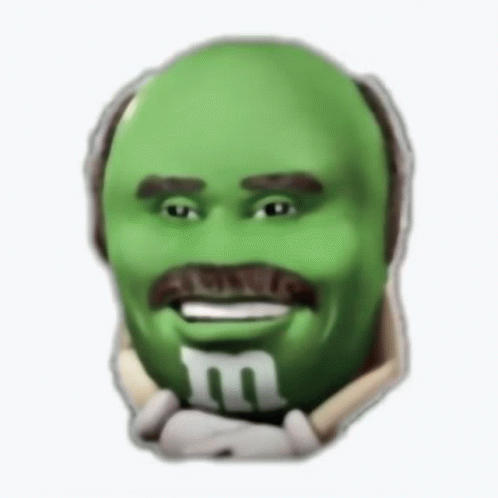

### Even PCA?

Well, we won't really implement PCA, that has some constraint on the definition of the matrixes, but at the end of the day, is purely a linear transformation of the data, and it has been proven that any linear transformation of it will lead to the same solution or to an equivalent one (same loss)

so, what we need is to minimize the following:
$$
L(\theta) = \sum_x (W^T(Wx) - x)^2
$$
Thus, we first project $x$ to a lower dimensional space via $W$, and via $W^$ we project it back to the original one, and we hope that such projection-back reconstruct $x$ as good as possible (for simplicity, we assume that the mean is 0, so we don't need the bias, but it's trivially fixable, feel free to try)

In [ ]:
class PCA_model(torch.nn.Module):
    def __init__(self, inputSize, outputSize, device=None):
        super(PCA_model, self).__init__()

        # I like to set the device manually for each model I define
        if device is None:
            device = torch.device('cpu')
        self.device = device

        # We are manually defining a parameter of the model
        # We need to use this class and tell the model that it should train it
        self.W = torch.nn.Parameter(torch.randn((outputSize, inputSize))*.75,
                                    requires_grad=True) # <--- this allows gradient descend/ascend

    # This model applies a linear transformation to each vector in the input batch
    # y = A*x
    def forward(self, x):
        out = torch.bmm(self.W.repeat(x.size(dim=0), 1, 1), x.unsqueeze(-1))
        return out

    def perform_pca(self, x):
        y = self(x)

        #print('y.size():', y.size())

        return torch.bmm(self.W.t().repeat(x.size(dim=0), 1, 1), y).squeeze(-1)

    def cuda(self, n=0):
        self.device = torch.device('cuda:0')
        self.linear.to(self.device)

In [ ]:
data = torch.randn((100,10)) * 5.0

pca_model = PCA_model(data.size()[1], outputSize=2)

optimizer = torch.optim.Adam(pca_model.parameters(), lr=5e-2)

epochs = 1000

for epoch in range(epochs):
    inputs = data
    labels = data

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = pca_model.perform_pca(inputs)

    #print('inputs.size():', inputs.size())
    #print('outputs.size():', outputs.size())

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(data)
rec = pca.inverse_transform(res)

with torch.no_grad():
    rec_model=pca_model.perform_pca(data)

error_model = ((rec_model - data).detach().cpu().numpy()**2)
error_pca = ((data.numpy() - rec)**2)

print(f"MSE closed form: {error_pca.mean()} - MSE gradient solution: {error_model.mean()}")

plt.figure()
plt.scatter(np.arange(error_pca.size), np.sqrt(error_pca), color='b', label='PCA')
plt.scatter(np.arange(error_pca.size), np.sqrt(error_model), color='r', label='PCA model')
plt.grid()
plt.legend()
plt.show()

## Neural network time


Ever coded a neural network from scratch? Well, for those who said not, it's time to finally do it right?

For the data, say we will have 6 dimensions, some will be used, some won't

In [ ]:
data = torch.randn((1000, 6))
# the target is unreadable on purpose, I'm just applying random non linear transformation to the data, plus some noise
targets = torch.sqrt(torch.abs((data[:, 0] * 10)**2 + torch.exp(data[:, 1]) - (data[:, 3] + data[:, 5])/torch.abs(data[:, 4]))) + torch.randn((1000,))
targets = targets.unsqueeze(-1)

Now, let's recall that a fully connected layer is composed by the following:
$$
x \in R^n\\
W \in R^{n\times m}\\
b \in R^m\\
\\
output = \sigma(Wx + b)\\
$$

Well, doesn't seem too different from what we have done so far right? Then let's go on implementing it (the index in the variable refers to each layer)

In [ ]:
import copy

class NN_model(torch.nn.Module):
    def __init__(self, inputSize, outputSize, hidden_size=1000, n_hidden=2, activation='relu', device=None):
        super(NN_model, self).__init__()

        # I like to set the device manually for each model I define
        if device is None:
            device = torch.device('cpu')
        self.device = device

        # Variable size and depth
        layers = [torch.nn.Linear(inputSize, hidden_size)]
        for _ in range(n_hidden):
            layers.append(torch.nn.Linear(hidden_size, hidden_size))
        layers.append(torch.nn.Linear(hidden_size, outputDim))

        # The parameter list is important, if we don't use it, the optimization doesn't work
        self.layers = torch.nn.ParameterList(layers)

        # implemented activation for hiddden layers
        if activation == 'relu':
            self.activation = torch.nn.ReLU()
        else:
            raise NotImplementedError(activation)


    # This model applies a linear transformation to each layer and then a nonlinear activation function
    def forward(self, x):
        out = copy.deepcopy(x)
        for l in self.layers[:-1]:
            out = self.activation(l(out))

        return self.layers[-1](out) # Last layer is just a linear transformation

    def cuda(self, n=0):
        self.device = torch.device('cuda:'+str(n))
        for l in self.layers[:-1]:
            l.to(self.device)

    def fit(self, inputs, labels, optimizer, criterion, epochs=100):
        for epoch in range(epochs):
            # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
            optimizer.zero_grad()

            # get output from the model, given the inputs
            outputs = self(inputs)

            # get loss for the predicted output
            loss = criterion(outputs, labels)
            print(loss)
            # get gradients w.r.t to parameters
            loss.backward()

            # update parameters
            optimizer.step()

            print('epoch {}, loss {}'.format(epoch, loss.item()))


In [ ]:
hyperparams = {'inputSize': 6,
               'outputSize': 1,
               'hidden_size': 500,
               'n_hidden': 3,
               'activation': 'relu'}

nn_regressor = NN_model(**hyperparams)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(nn_regressor.parameters(), lr=5e-2)

nn_regressor.fit(data, targets, optimizer, criterion, epochs=1000)

In [ ]:
with torch.no_grad():
    y_hat = nn_regressor(data)

error_model = ((y_hat - targets).detach().cpu().numpy()**2)

plt.figure()
plt.scatter(np.arange(error_model.size), np.sqrt(error_model), color='r', label='root MSE model')
plt.grid()
plt.legend()
plt.show()

with torch.no_grad():
    y_hat = nn_regressor(data)

plt.figure(figsize=(15, 5))
plt.plot(targets, color='b', label='truth')
plt.plot(y_hat, color='r', label='model')
plt.grid()
plt.legend()
plt.show()

And now, thanks to the magic of OOP, you can mix your blocks of code with parts coming from other developers, hopefully without loosing too many hours adapting it

### Real world scenario

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch, log_interval=1000):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
# Training settings
### PyTorch MNIST Example'
batch_size = 64
test_batch_size=1000
epochs = 14
lr = 0.1
gamma=0.7
seed=1

use_cuda = torch.cuda.is_available()

# VERY important:
torch.manual_seed(seed)

What is a [seed](https://en.wikipedia.org/wiki/Random_seed)? Basicaslly it's a very important number for sampling.

Try to run the cells below multiple times:

In [ ]:
torch.manual_seed(1)
random = torch.randn((1000, 6))

print(random)

In [ ]:
torch.manual_seed(2)
random = torch.randn((1000, 6))

print(random)

If we manually set a the seed for sampling, we can reproduce the sampling results!

Thats the reason that statistics in ML are extracted by performing multiple executions changing the seed.

In [ ]:
if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}

if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

dataset1 = datasets.MNIST('data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

That was all from me, hope that it was clear and that you liked it, feel free to experiment a bit, next time we will start from here and use the custom training loop that we saw earlier to train a RL agent

Have funnnnnnnnn


![](https://media.tenor.com/lfDHEnYIUk4AAAAC/this-is-where-the-fun-begins-star-wars.gif)

## (Fun) Exercises

For the braves, I leave here some exercises (they should be pretty simple) to explore a bit and test your knowledge.

I'll give you the main structure of the code and you can just complete it, however, to achieve the same results, there are hundreds of ways, so if you find my scaffolding too cumbersome, or you think there is a better way (let alone possible errors), feel free to experiment... ad if you have questions, feel free to write me at [alberto.sinigaglia@phd.unipd.it](mailto:alberto.sinigaglia@phd.unipd.it)

### Batch Normalization

[Batch Normalization](https://arxiv.org/abs/1502.03167) is a very famous building block for neural networks, it is fundamental for big models, as it solves (tackles at least) a very famous problem in deep hierarchical models, called _internal covariate shift_... in poor words, when you change the parameters in the initial layers, their change is amplified by the change in the next layers, and when you get to the final layers, you have a completely different representation for the same image, thus the final layer has to be trained from scratch.

What BN do is pretty simple, and it's, as the name suggests, a normalization of each batch (intra network, so it's not just a preprocessing).
Given a batch of data of size $N$, BN applied to the $M$th layer, forward propagates the batch in the previous layers, obtaining the batch tensor $t$, and does the following:
$$
\mu = \frac{\sum_{i=0}^N t_i}{N} \\
\sigma^2 = \frac{\sum_{i=0}^N (t_i - \mu)^2}{N} \\
\hat{t} = \frac{t - \mu}{\sqrt{\sigma} + \epsilon}\\
t_\text{final} = \gamma \hat{t} + \beta
$$
in poor words, it first normalizes the batch, and then rescales and shift the tensor using $\beta, \gamma$, which are trained parameters, so that the network is free to learn where is best to have such distribution.

Let's create a Layer that does exactly that (actually, usually $\mu, \sigma$ are moving average, because you need a good statistic for this to work)

Use the BatchNorm [Layer](https://pythonguides.com/pytorch-batch-normalization/)

### Residual connection

[Residual networks](https://arxiv.org/abs/1512.03385) are the other big famous super used building block for big networks. They solve an orthogonal problem to the one of BN, which is the vanishing gradient. What was observed before ResNet was that deep networks performed better than shallow networks, up to a certain point, and then performances worsened.

The problem is that given a N layer network, you can easily approximate it with a M layer network (M > N), by setting its first N layers with the same weights as the other network, and then the last M-N with an identity function.

However, layers are initialized so that they approximate the zero-function (weights close to 0), so the network has a hard time learning the identity.

To solve that, they just added a residual connection, which is "you some to your output, your input" (given that they have the same shape, otherwise you can concatenate it in some way):
$$
y_i = F(x_i) + x_i
$$
That's all... the intuition is that $F(x_i)$ is initialized with the 0-function, so if it's useless (like the last M-N layers in the previous example), you can just not learn anything in the last layers, and forward the information.

You can also think this as a "gradient descent" idea, where indeed GD has as update $x_i = x_i + F(x_i)$, where $F$ is just the gradient.


Let's code it!

### Dropout

[Dropout](https://arxiv.org/abs/1207.0580) is a very famous regularization method proposed from Hinton, that has a toooon of intuitions behind it... in very few words, it just randomly sets values to 0 with some probability (that you choose)

You can see this as a "regularization" since the network cannot rely always on the same information/neuron to predict, or you can see this as a cheap way of training an ensemble of neural networks.

To do so, we just do the following:
$$
m \sim Be(p) ^ {N} \\
y_i = F(x_i) \cdot m
$$

So it's pretty simple, we just need to create a layer that samples random binary masks form a Bernoulli distribution, and multiply.
At test time, we keep all the neurons on and we rescale the activation by $1-p$ (since you would have only $p$ active neurons, you "overstimulate the neuron if you activate all connections without rescaling the sum)

Let's do it.

![](https://media.tenor.com/JOJ1qSZon7UAAAAC/shia-labeouf-just-do-it.gif)